# Dataset Visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from tqdm import tqdm


In [2]:
%matplotlib inline

In [3]:
# Update the local folder path where we have stored your dataset files
folder_path = 'dataset'
file_paths = glob.glob(folder_path + '/*.csv')


In [4]:
df = pd.DataFrame()
for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
    dff = pd.read_csv(file_path)
    df = pd.concat([df, dff], ignore_index=True)

# Display the first few rows of the DataFrame
df.head()

Processing files: 100%|██████████████████████████████████████████████████████████████| 35/35 [01:24<00:00,  2.40s/file]


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [5]:
# Display basic information about the DataFrame
print(df.shape)

(8706783, 47)


In [6]:
print(df.head())

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           IAT  Number   Magnitue     Radius  \
0   

In [7]:
print(df.tail())

         flow_duration  Header_Length  Protocol Type  Duration          Rate  \
8706778      71.960989     5346325.30           6.00     64.00     68.530186   
8706779       0.053804       26845.00          17.00     64.00  10248.904538   
8706780       0.000000           0.00          47.00     64.00     88.148964   
8706781       0.020690         112.00           6.00     45.90     96.677568   
8706782       0.000014           8.16           1.79     67.82    225.294038   

                Srate  Drate  fin_flag_number  syn_flag_number  \
8706778     68.530186    0.0              0.0              0.0   
8706779  10248.904538    0.0              0.0              0.0   
8706780     88.148964    0.0              0.0              0.0   
8706781     96.677568    0.0              0.0              1.0   
8706782    225.294038    0.0              0.0              0.0   

         rst_flag_number  ...         Std  Tot size           IAT  Number  \
8706778              0.0  ...  865.370670   1

In [8]:
#printing features
print(df.keys())


Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [9]:
#memory usage and the T.number of entries
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [11]:
print(df['label'].nunique())

34


In [12]:
print(df['label'].unique())

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack']


In [13]:
df['label'].value_counts()

label
DDoS-ICMP_Flood            1343257
DDoS-UDP_Flood             1010641
DDoS-TCP_Flood              839446
DDoS-PSHACK_Flood           763443
DDoS-SYN_Flood              757328
DDoS-RSTFINFlood            753657
DDoS-SynonymousIP_Flood     669686
DoS-UDP_Flood               618696
DoS-TCP_Flood               498357
DoS-SYN_Flood               376975
BenignTraffic               205116
Mirai-greeth_flood          184361
Mirai-udpplain              166386
Mirai-greip_flood           140681
DDoS-ICMP_Fragmentation      84273
MITM-ArpSpoofing             57612
DDoS-UDP_Fragmentation       53846
DDoS-ACK_Fragmentation       53402
DNS_Spoofing                 33527
Recon-HostDiscovery          24900
Recon-OSScan                 18297
Recon-PortScan               15264
DoS-HTTP_Flood               13448
VulnerabilityScan             6978
DDoS-HTTP_Flood               5406
DDoS-SlowLoris                4432
DictionaryBruteForce          2399
BrowserHijacking              1062
SqlInjection  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [15]:
# Sub-class Mapping , classify each attack separately by their family
mapping = {
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'BenignTraffic': 'Benign',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'MITM-ArpSpoofing': 'MITM',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DNS_Spoofing': 'Spoofing',
    'Recon-HostDiscovery': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'DoS-HTTP_Flood': 'DoS',
    'VulnerabilityScan': 'Recon',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DictionaryBruteForce': 'BruteForce',
    'BrowserHijacking': 'Hijacking',
    'CommandInjection': 'Injection',
    'SqlInjection': 'Injection',
    'XSS': 'XSS',
    'Backdoor_Malware': 'Malware',
    'Recon-PingSweep': 'Recon',
    'Uploading_Attack': 'Upload'
}

In [16]:
df['label'] = df['label'].map(mapping)

In [17]:
df['label'].value_counts()

label
1    8501667
0     205116
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706783 entries, 0 to 8706782
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [19]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [20]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [21]:
# Scaling the features
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])


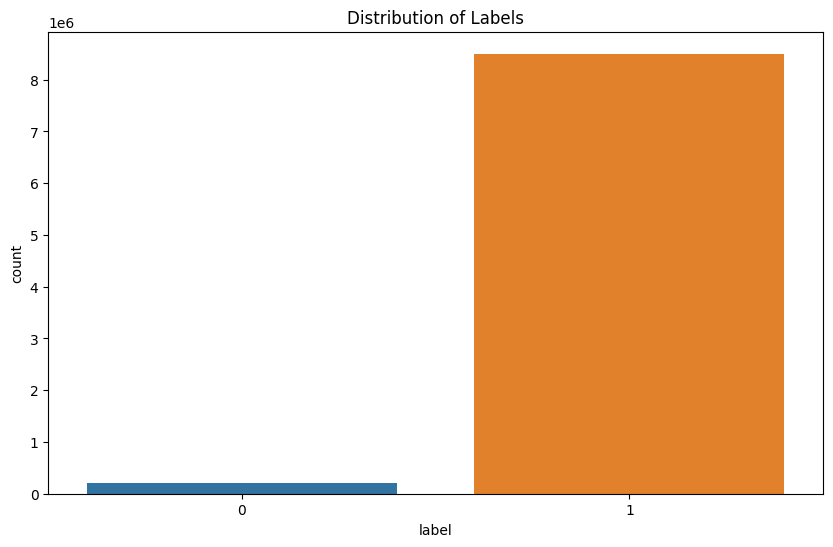

In [22]:
# Visualizing the label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

In [23]:
# Splitting the dataset into training and testing sets
X = df.drop(columns='label')
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


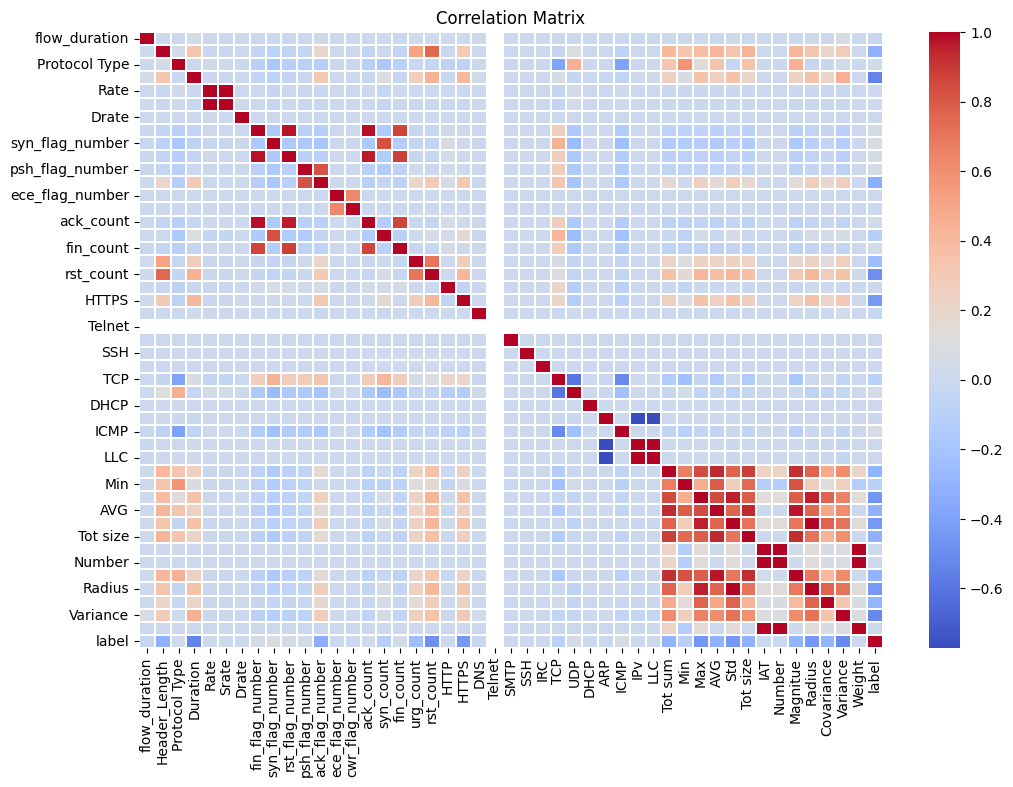

In [25]:
# Visualizing correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Display the first few rows of the processed DataFrame
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

         flow_duration  Header_Length  Protocol Type  Duration      Rate  \
797429       -0.020428      -0.119464       0.862333 -0.167861 -0.046392   
1007485      -0.021075      -0.166423      -0.342912 -0.049824 -0.090712   
4156456      -0.021081      -0.166425      -0.342912 -0.167861 -0.090734   
3807121      -0.020289      -0.102649       0.886930 -0.122353 -0.064807   
1361388      -0.021081      -0.166425      -0.342912 -0.167861 -0.090718   

            Srate     Drate  fin_flag_number  syn_flag_number  \
797429  -0.046392 -0.000697        -0.307699        -0.510975   
1007485 -0.090712 -0.000697         3.249927        -0.510975   
4156456 -0.090734 -0.000697        -0.307699         1.957044   
3807121 -0.064807 -0.000697        -0.307699        -0.510975   
1361388 -0.090718 -0.000697         3.249927        -0.510975   

         rst_flag_number  ...       AVG       Std  Tot size       IAT  \
797429         -0.315310  ... -0.308731 -0.204098 -0.308059 -0.003829   
100748

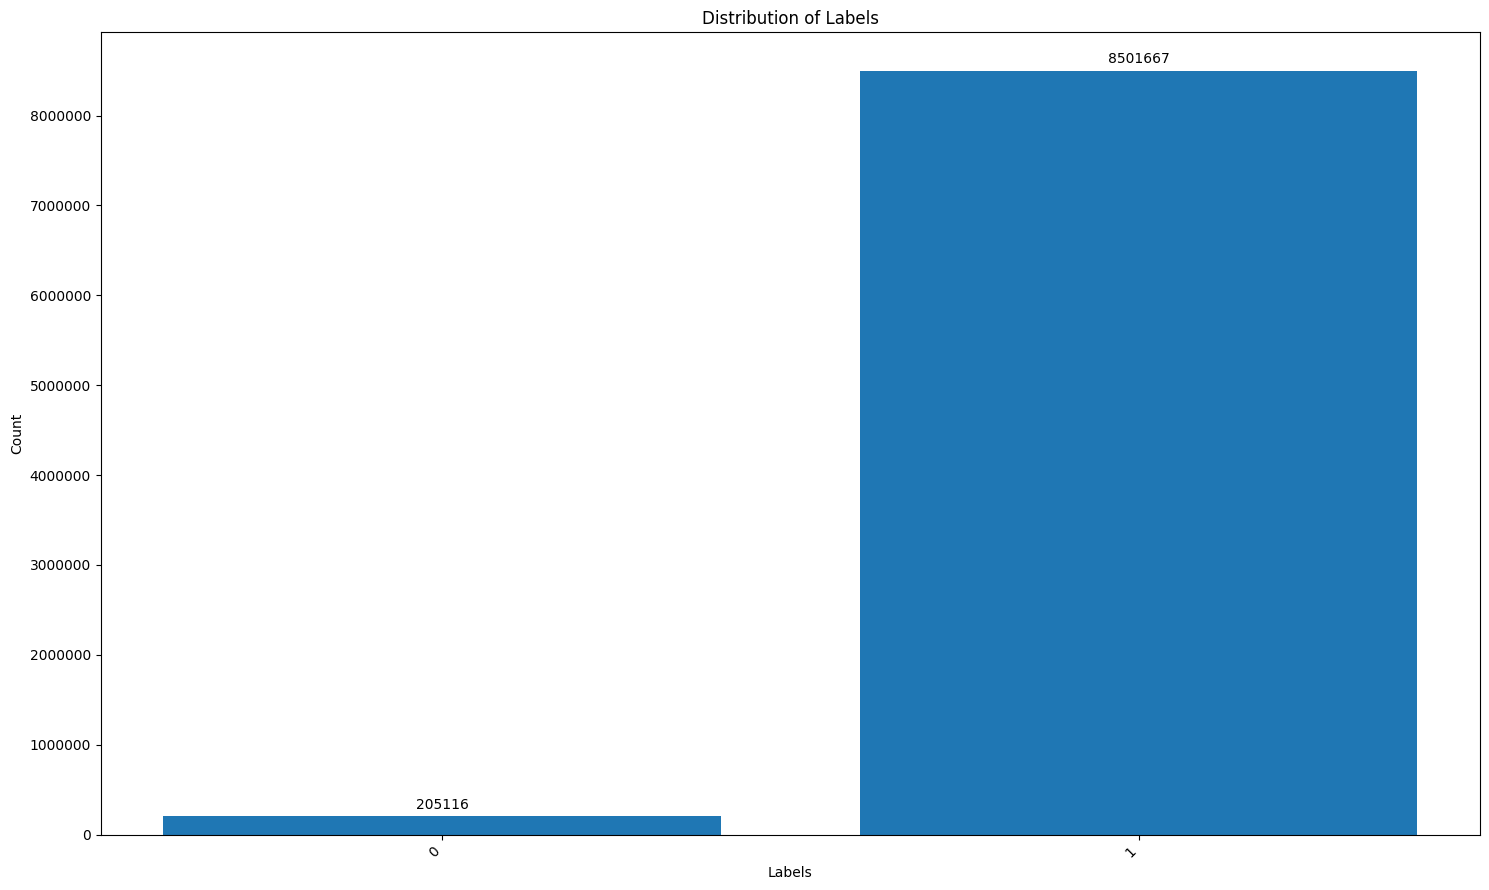

In [28]:
# Create a bar chart for the label distribution with exact counts
fig, ax = plt.subplots(figsize=(15, 9))
label_counts = df["label"].value_counts()
bars = ax.bar(label_counts.index, label_counts.values, width=0.8)

# Set the ticks and labels on the x-axis
ax.set_xticks(label_counts.index)
ax.set_xticklabels(label_counts.index, rotation=45, ha='right')

# Format the number on the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Add labels and titles
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')

# Show exact figures at the top of each column
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()